# Spectral Layout

In [1]:
# import necessary Python packages
import os
import numpy as np
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [154]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Reference object

In [2]:
img=mpimg.imread('data/layout.jpg')

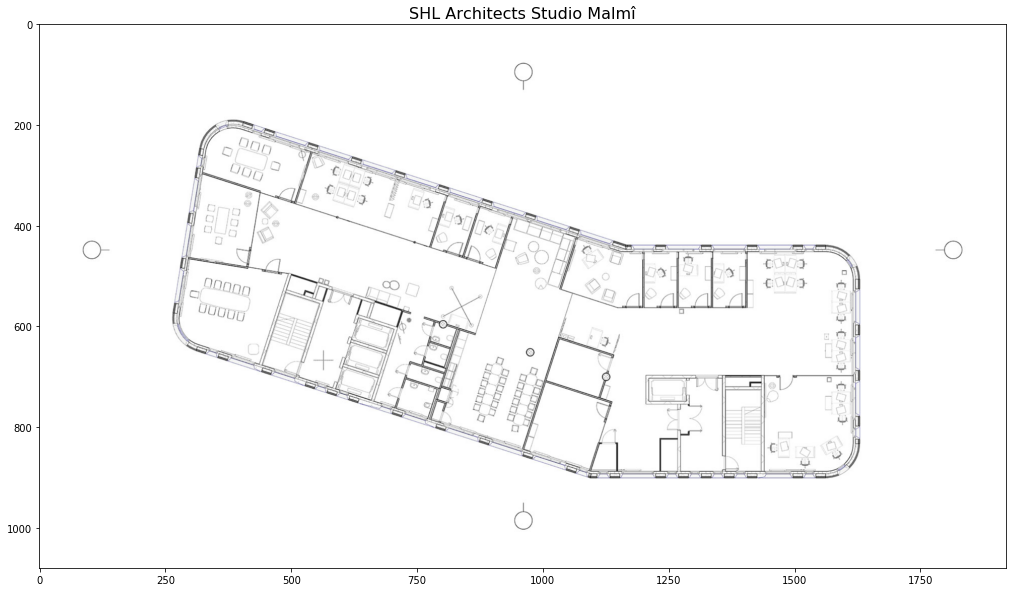

In [3]:
fig = plt.figure(figsize = (30,10))
a = fig.add_subplot(1, 1, 1)
imgplot = plt.imshow(img, interpolation="bilinear")
a.set_title('SHL Architects Studio Malmî', fontsize=16);

## Get structured data

In [4]:
import pandas as pd
# Load data 
data = pd.read_csv('data/door_schedule.csv', skiprows=[2], keep_default_na=False)
data.columns = data.iloc[0]
data.drop([0], inplace=True)

In [5]:
data

,Mark,From Room: Number,To Room: Number,Rough Width,Rough Height
1,632296,1,16,1015,2102
2,642739,2,16,1015,2102
3,650548,3,16,1015,2102
4,196335,4,16,1015,2102
5,654502,6,16,1015,2102
6,320281,7,16,970,1680
7,320293,7,16,970,1680
8,655552,8,16,1015,2102
9,652881,9,16,1015,2102
10,542383,10,16,810,1900


In [6]:
fr = np.array(data['From Room: Number'][:-1])

In [7]:
fr.reshape(fr.shape[0], 1).shape

(26, 1)

In [8]:
to = np.array(data['To Room: Number'][:-1])

In [9]:
to.reshape(to.shape[0], 1).shape

(26, 1)

In [10]:
pairs = np.vstack((fr, to)).T

In [219]:
pairs

array([['1', '16'],
       ['2', '16'],
       ['3', '16'],
       ['4', '16'],
       ['6', '16'],
       ['7', '16'],
       ['7', '16'],
       ['8', '16'],
       ['9', '16'],
       ['10', '16'],
       ['12', '16'],
       ['14', '16'],
       ['16', '5'],
       ['16', '11'],
       ['16', '13'],
       ['16', '15'],
       ['16', '17'],
       ['16', '20'],
       ['18', '16'],
       ['19', '16'],
       ['21', '16'],
       ['21', '22'],
       ['23', '16'],
       ['23', '24'],
       ['23', '25'],
       ['25', '16']], dtype=object)

In [228]:
c = np.array(G.edges).T[2].astype(int)

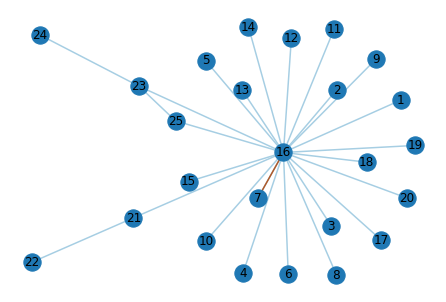

In [262]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

 
# Create a networkx graph object
G = nx.MultiGraph() 
 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
G.add_edges_from(pairs)

pos = nx.spring_layout(G)
# Draw the resulting graph
nx.draw(G, pos, with_labels=True, edge_color=c, width=1.5, edge_cmap=plt.cm.Paired)

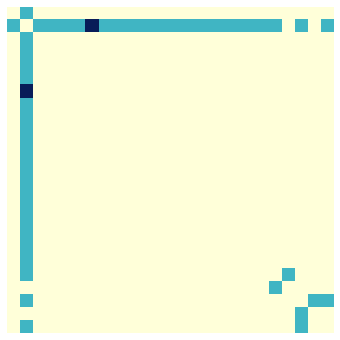

In [224]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

## Preprocessing

In [29]:
import seaborn as sns

In [30]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    
    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    
    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    
    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [31]:
rw = np.array(data['Rough Width'][:-1]).astype(int)

In [32]:
rh = np.array(data['Rough Height'][:-1]).astype(int)

In [33]:
R = np.array([rw, rh]).T

In [34]:
R.shape

(26, 2)

In [35]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [36]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

In [37]:
R = center(R)

Covariance matrix:
 [[78489.07248521 15016.40236686]
 [15016.40236686 16871.62130178]]


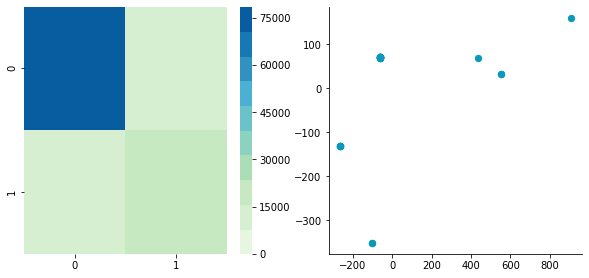

In [38]:
plotDataAndCov(R)
plt.show()
plt.close()

In [39]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

In [41]:
R = standardize((R))

Covariance matrix:
 [[1.         0.41265099]
 [0.41265099 1.        ]]


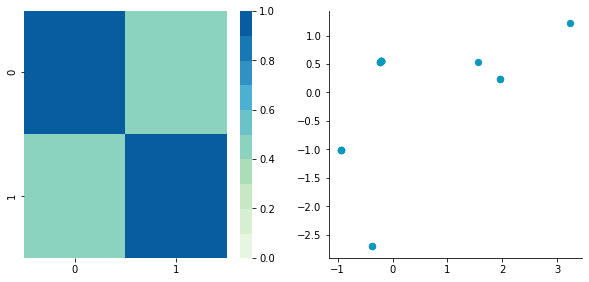

In [42]:
plotDataAndCov(R)
plt.show()
plt.close()

In [43]:
def whiten(X):
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

In [44]:
R = whiten(R)

Covariance matrix:
 [[9.99992921e-01 6.98715852e-17]
 [6.98715852e-17 9.99982975e-01]]


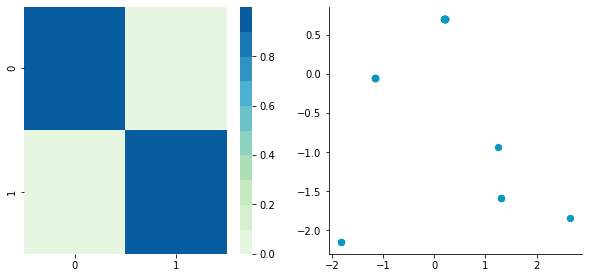

In [45]:
plotDataAndCov(R)
plt.show()
plt.close()

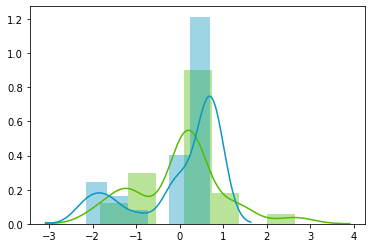

In [46]:
sns.distplot(R[:,0], color="#53BB04")
sns.distplot(R[:,1], color="#0A98BE")
plt.show()
plt.close()